# CREDIT CARD FRAUD DETECTION USING MACHINE LEARNING ALGORITHM

In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [5]:
# Load your datasets
train_data = pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudtest.csv")

# Check the first few rows of both datasets to ensure they are loaded correctly
print("Training Data")
print(train_data.head())

print("Testing Data")
print(test_data.head())


Training Data
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suit

In [6]:
# Convert 'trans_date_trans_time' to datetime in training data
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])

# Extract additional datetime features in training data
train_data['trans_year'] = train_data['trans_date_trans_time'].dt.year
train_data['trans_month'] = train_data['trans_date_trans_time'].dt.month
train_data['trans_day'] = train_data['trans_date_trans_time'].dt.day
train_data['trans_time'] = train_data['trans_date_trans_time'].dt.time

# Convert 'dob' (date of birth) to age in training data
train_data['dob'] = pd.to_datetime(train_data['dob'], errors='coerce')
train_data['age'] = (datetime.now() - train_data['dob']).dt.days // 365
train_data['age'] = train_data['age'].fillna(train_data['age'].median())


In [7]:
# Convert 'trans_date_trans_time' to datetime in testing data
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

# Extract additional datetime features in testing data
test_data['trans_year'] = test_data['trans_date_trans_time'].dt.year
test_data['trans_month'] = test_data['trans_date_trans_time'].dt.month
test_data['trans_day'] = test_data['trans_date_trans_time'].dt.day
test_data['trans_time'] = test_data['trans_date_trans_time'].dt.time

# Convert 'dob' (date of birth) to age in testing data
test_data['dob'] = pd.to_datetime(test_data['dob'], errors='coerce')
test_data['age'] = (datetime.now() - test_data['dob']).dt.days // 365
test_data['age'] = test_data['age'].fillna(test_data['age'].median())


In [8]:
# Calculate the distance to merchant for training data
def calculate_distance(row):
    transaction_location = (row['lat'], row['long'])
    merchant_location = (row['merch_lat'], row['merch_long'])
    return geodesic(transaction_location, merchant_location).km

train_data['distance_to_merchant'] = train_data.apply(calculate_distance, axis=1)


In [9]:
# Calculate the distance to merchant for testing data
test_data['distance_to_merchant'] = test_data.apply(calculate_distance, axis=1)


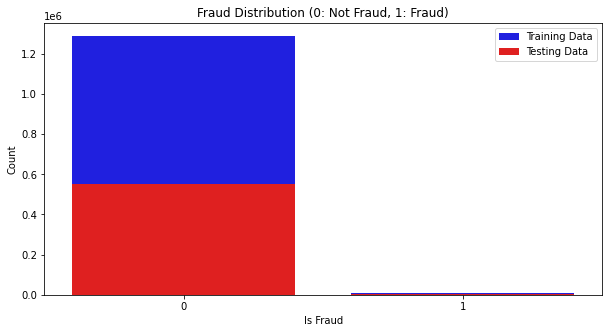

In [11]:
# Plot fraud distribution for both training and testing data
plt.figure(figsize=(10,5))
sns.countplot(x='is_fraud', data=train_data, color='blue', label='Training Data')
sns.countplot(x='is_fraud', data=test_data, color='red', label='Testing Data')
plt.title('Fraud Distribution (0: Not Fraud, 1: Fraud)')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.legend()
plt.show()


In [12]:
# Select relevant features for model (same for both training and testing data)
features = ['amt', 'age', 'trans_year', 'trans_month', 'distance_to_merchant']

# For Training Data
X_train = train_data[features]
y_train = train_data['is_fraud']

# For Testing Data
X_test = test_data[features]
y_test = test_data['is_fraud']


In [15]:
# Train a logistic regression model on training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on test data
y_pred = model.predict(X_test)



In [24]:

# Ensure the 'is_fraud' column contains only 0 or 1 (in case of any non-binary values)
# This will handle cases where values might be present as 'yes'/'no', 'fraud'/'non-fraud', etc.
data['is_fraud'] = data['is_fraud'].apply(lambda x: 1 if x == 'fraud' else (0 if x == 'non-fraud' else x))

# Ensure that we have the correct data types
data['is_fraud'] = data['is_fraud'].astype(int)

# Check the resulting data
print(data[['is_fraud']].head())


   is_fraud
0         0
1         0
2         0
3         0
4         0


In [16]:
# Evaluate the model
print(f"Accuracy on Test Data: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy on Test Data: 0.9955175187459849
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



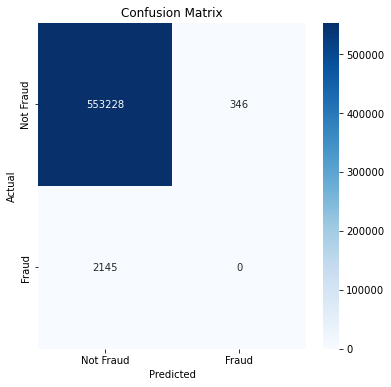

In [17]:
# Plot confusion matrix for test data predictions
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
